In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston


In [2]:
data, targets = load_boston(return_X_y=True)
shuffle = np.random.permutation(len(targets))
data = data[shuffle]
targets = targets[shuffle]


In [3]:
print(data.shape)
print(targets.shape)


(506, 13)
(506,)


# Implementing Least Squares Regression, Ridge Regression, and Cross Validation

Note that least squares regression is just ridge regression with lambda = 0

In [4]:
def ridge(X, y, lamb=0):
    return np.linalg.inv(X.T @ X + lamb * np.eye(np.shape(X)[1])) @ X.T @ y


In [5]:
def cross_val(X, y, folds=5, lamb=0):
    X = np.hstack((X, np.ones((len(X), 1))))
    pred_all = np.array([])
    errors = []
    len_data = len(y)
    fold_size = math.ceil(len_data / folds)
    for i in range(0, len_data, fold_size):
        X_train = np.vstack((X[:i], X[i+fold_size:]))
        y_train = np.concatenate((y[:i], y[i+fold_size:]))
        X_test = X[i:i+fold_size]
        y_test = y[i:i+fold_size]
        
        weights = ridge(X_train, y_train, lamb=lamb)
        pred = X_test @ weights
        error = sum((y_test - pred)**2)/len(pred)
#         for a, b in zip(y_test, pred):
#             print(a, b)
        pred_all = np.concatenate((pred_all, pred))
        errors.append(error)
    return np.mean(errors), pred_all
    

# Least Squares with 5-fold cross validation

In [6]:
error, pred = cross_val(data, targets, folds=5, lamb=0)
print('Average Prediction Error (MSE) is {}'.format(error))

Average Prediction Error (MSE) is 24.100203996726794


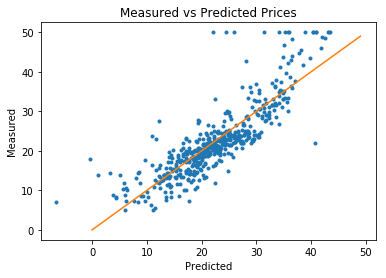

In [7]:
plt.figure()
plt.plot(pred, targets, '.')
line = list(range(int(max(targets))))
plt.plot(line, line)
plt.title('Measured vs Predicted Prices')
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()


# Ridge Regression

In [8]:
split = len(targets) // 5
data_train = data[split:]
targets_train = targets[split:]
data_val = data[:split]
targets_val = targets[:split]

lambdas = [0, 0.001, 0.01, .005, 0.1, 0.5, 1, 5, 10]
errors = []

for l in lambdas:
    error, _ = cross_val(data_train, targets_train, folds=4, lamb=l)
    errors.append(error)

minind = np.argmin(errors)
bef = max(0, minind-1)
aft = min(len(lambdas)-1, minind+1)
lamb_prev = lambdas[bef]
lamb_next = lambdas[aft]
min_lambda = 0
min_error = max(errors)
for i in range(1, int(lamb_next // lamb_prev) + 1):
    l = i * lamb_prev
    error, _ = cross_val(data_train, targets_train, folds=4, lamb=l)
    if error < min_error:
        min_error = error
        min_lambda = l
print('The lambda chosen from cross validation is {:.2f}'.format(min_lambda))

X_train = np.hstack((data_train, np.ones((len(data_train), 1))))
X_val = np.hstack((data_val, np.ones((len(data_val), 1))))

weights = ridge(X_train, targets_train, lamb=min_lambda)
preds = X_val @ weights
error = sum((preds - targets_val)**2) / len(preds)
print('The average prediction error on the validation data is {}'.format(error))


The lambda chosen from cross validation is 0.30
The average prediction error on the validation data is 21.855479873174488
